In [1]:
#個々のcsvデータをプロットする

'%.3f'

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd
import os

,Time(sec),Time(hh:mm:ss.msec),activity(G),breathing_rate(rpm),cadence(spm),minute_ventilation(ml/min),tidal_volume(ml),heart_rate(bpm),minute_ventilation_adjusted(ml/min),tidal_volume_adjusted(ml)
11,11.0,00:00:11.000,0.031250,36,0,20119.2,982.72,94,0,0
12,12.0,00:00:12.000,0.019531,35,0,20225.4,544.48,94,0,0
13,13.0,00:00:13.000,0.054688,34,0,20225.4,544.48,93,0,0
14,14.0,00:00:14.000,0.046875,35,0,20225.4,544.48,93,0,0
15,15.0,00:00:15.000,0.023438,35,0,20225.4,544.48,93,0,0
...,...,...,...,...,...,...,...,...,...,...
2836,2836.0,00:47:16.000,0.125000,11,0,26015.5,2828.64,97,0,0
2837,2837.0,00:47:17.000,0.128906,11,0,26015.5,2828.64,98,0,0
2838,2838.0,00:47:18.000,0.167969,11,0,26015.5,2828.64,98,0,0
2839,2839.0,00:47:19.000,0.210938,11,0,26015.5,2828.64,99,0,0


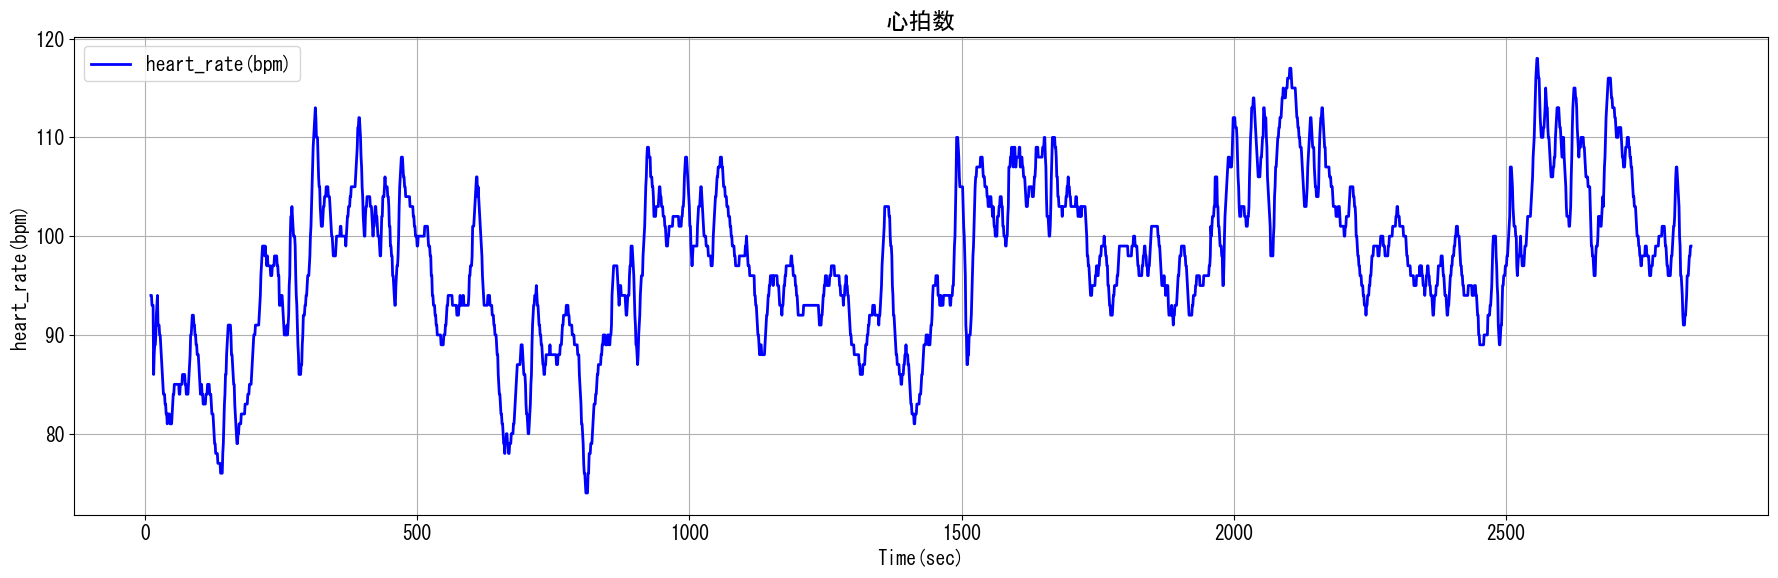

最大:118
平均:97.49328621908127
分散:64.46550262832584
偏差:8.029041202305905


In [10]:
#ポスターへ示すデータとして、バイタルデータ内の心拍数を示す.
"""
健康な成人の安静時の脈拍数は、個人差はありますが、1分間に約60～100回となっています。(参考:e-ヘルスネット)
https://www.e-healthnet.mhlw.go.jp/information/dictionary/exercise/ys-032.html

"""
save_flg = False
df = pd.read_csv('11月10日日産自動車工場作業環境再現調査_Processed.csv') 
# 0秒はデータが0なので除外する
df = df[df[df.columns[7]] >  70]
display(df)

time = 0
data_number = 7
save_flg=1
X = df[df.columns[time]]
Y = df[df.columns[data_number]]
#変数の間
color="#0000FF"
title = "心拍数"#df.columns[data_number]

xlabel = df.columns[time]
ylabel = df.columns[data_number]
font_size = 14
font_family = 'MS Gothic'
figsize = (12,4)
line_width = 2
rotation = 0

#x軸は時間なので固定
x_axis = X
#変化するのはY軸
y_axis = Y

plt.title(title)
plt.xlabel(df.columns[time])
plt.ylabel(ylabel)

plt.xlim()
plt.ylim()#心拍数の場合、数値の範囲を限定：(60,120)

plt.rcParams["font.size"] = font_size
plt.rcParams["font.family"] = font_family
plt.rcParams["figure.figsize"] = figsize

plt.xticks(rotation=rotation)

plt.plot(x_axis,y_axis,color=color,label=ylabel,linewidth=line_width)
plt.legend(ncol=1)
plt.grid()
#プロットした画像を保存する
if save_flg == True:
    # 余分な余白を最小限にする
    plt.tight_layout()
    # グラフ領域の外側の余白を最小限に
    #plt.margins(0)
    plt.savefig(title + ".jpg")
plt.show()

print("最大:" + str(max(Y)))
print("平均:" + str((np.mean(Y))))
print("分散:" + str(np.var(Y)))
print("偏差:" + str(np.std(Y)))

In [ ]:
#同じフォルダのcsvをプロットする

csvファイルの個数
データフレームのカラム数
csv_file_number_scale:4
csv_columns_number_scale:5


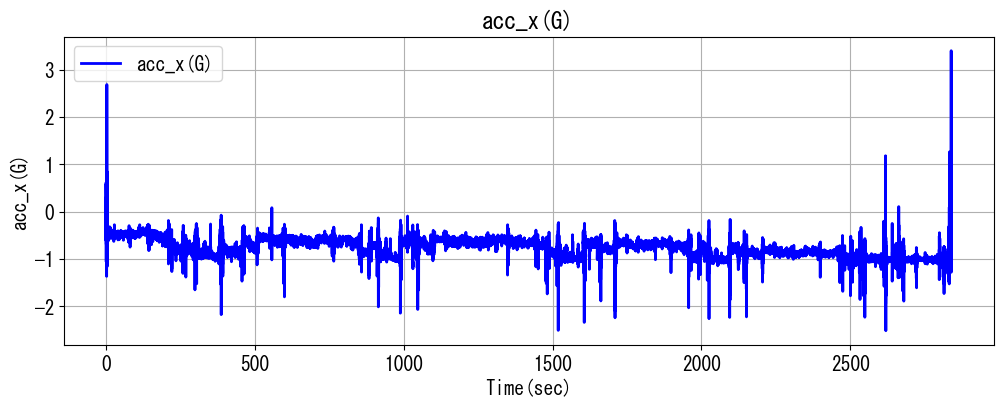

1


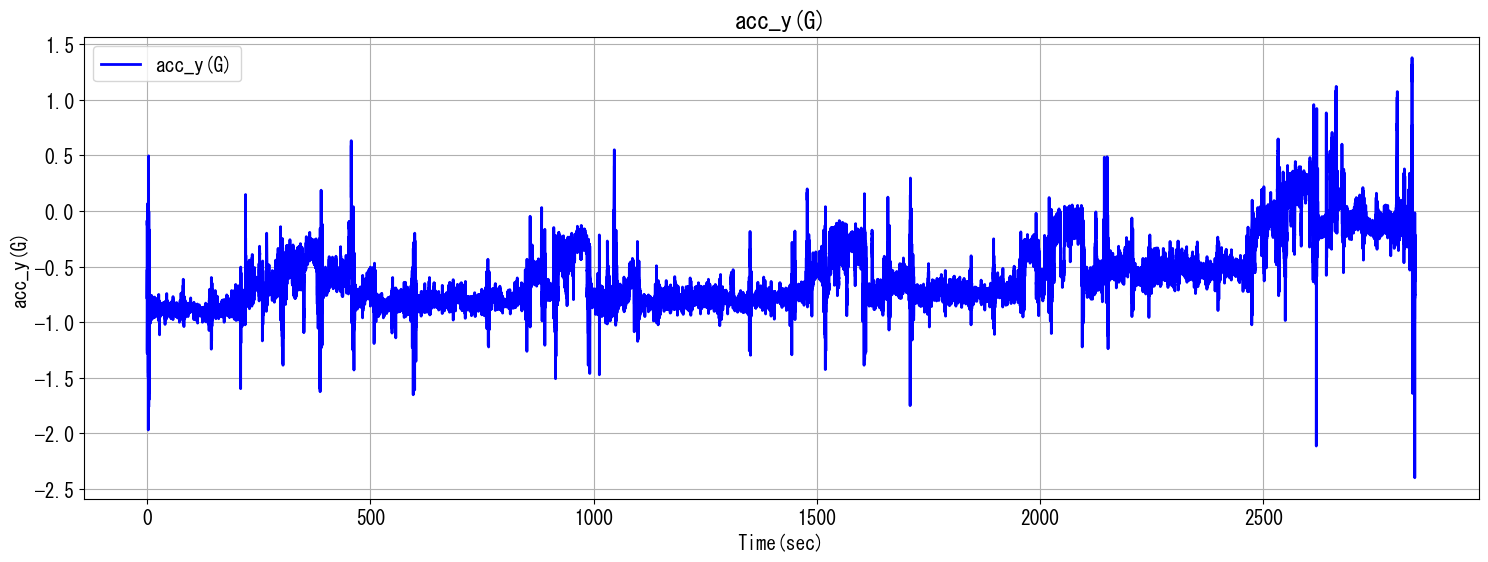

2


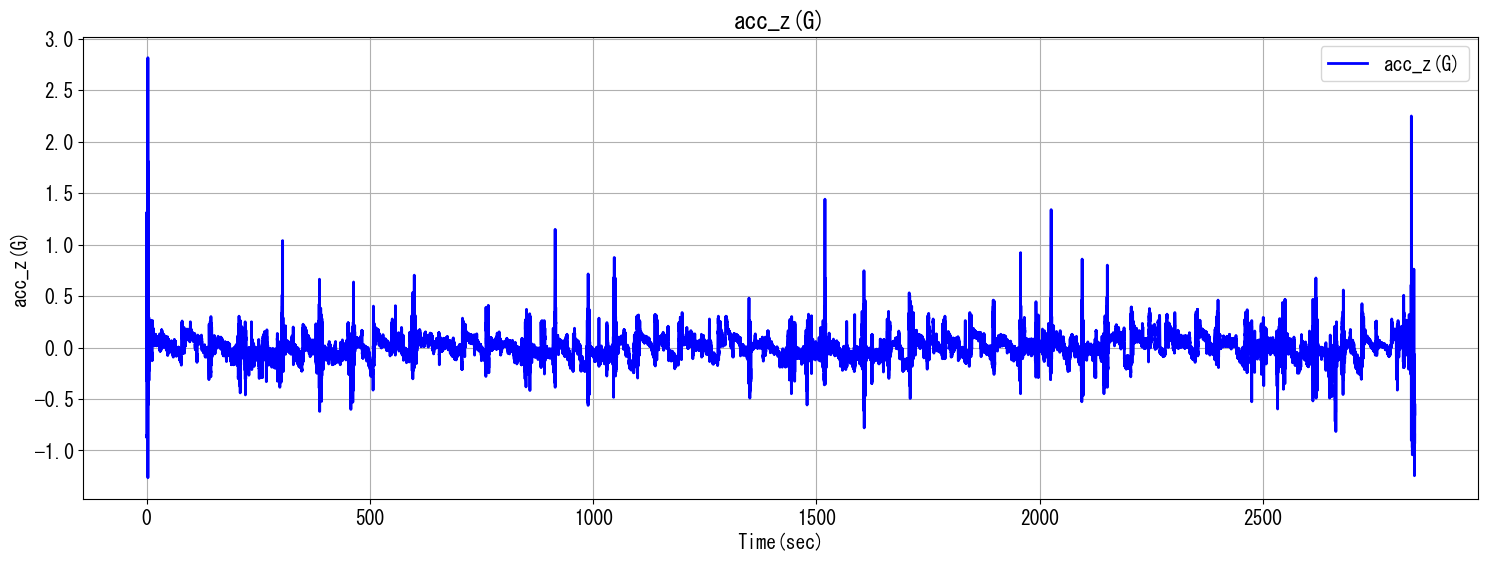

3


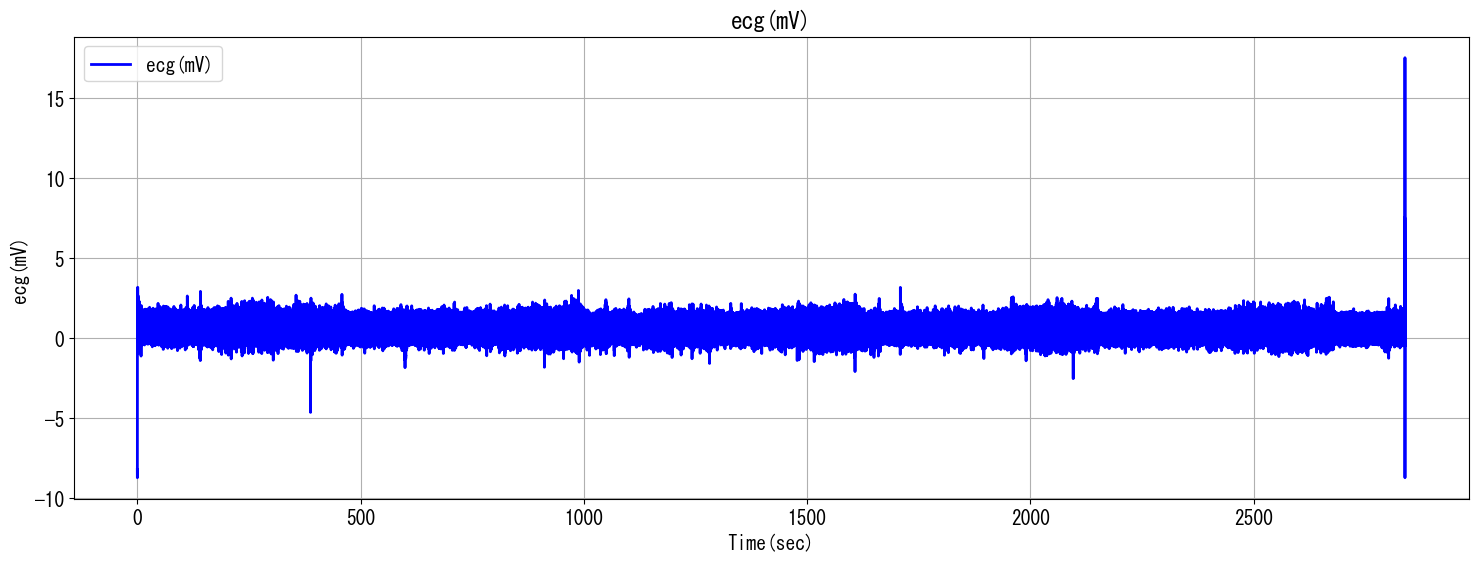

4


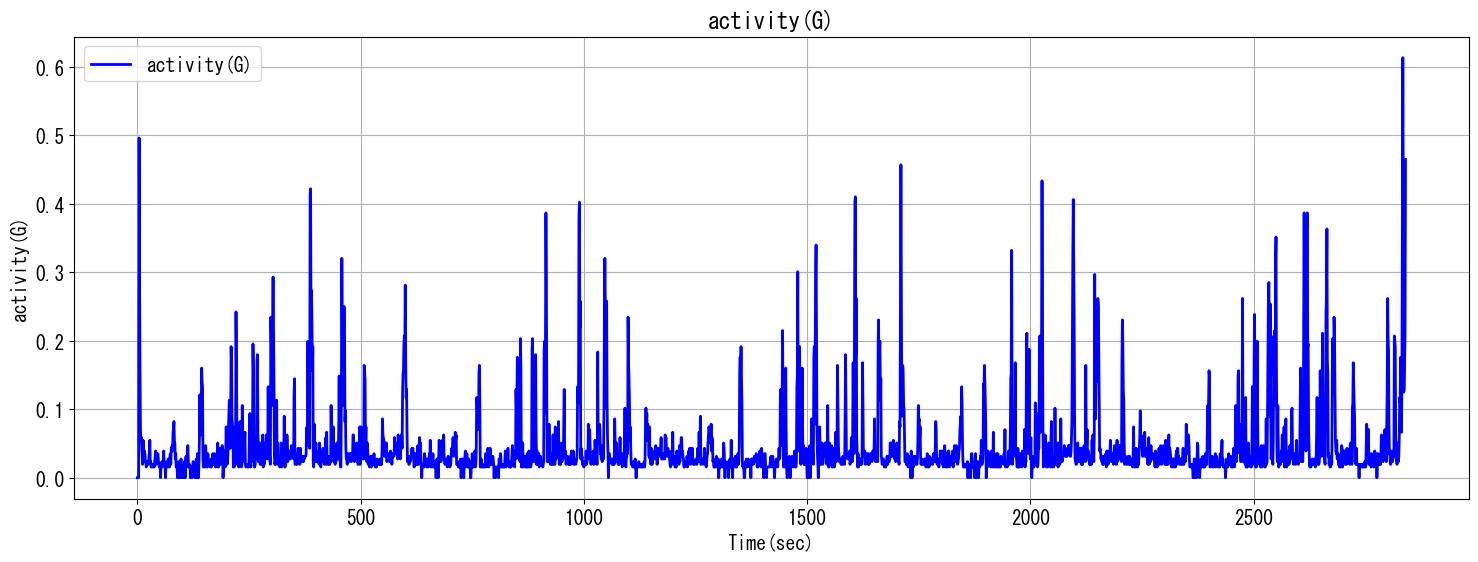

5


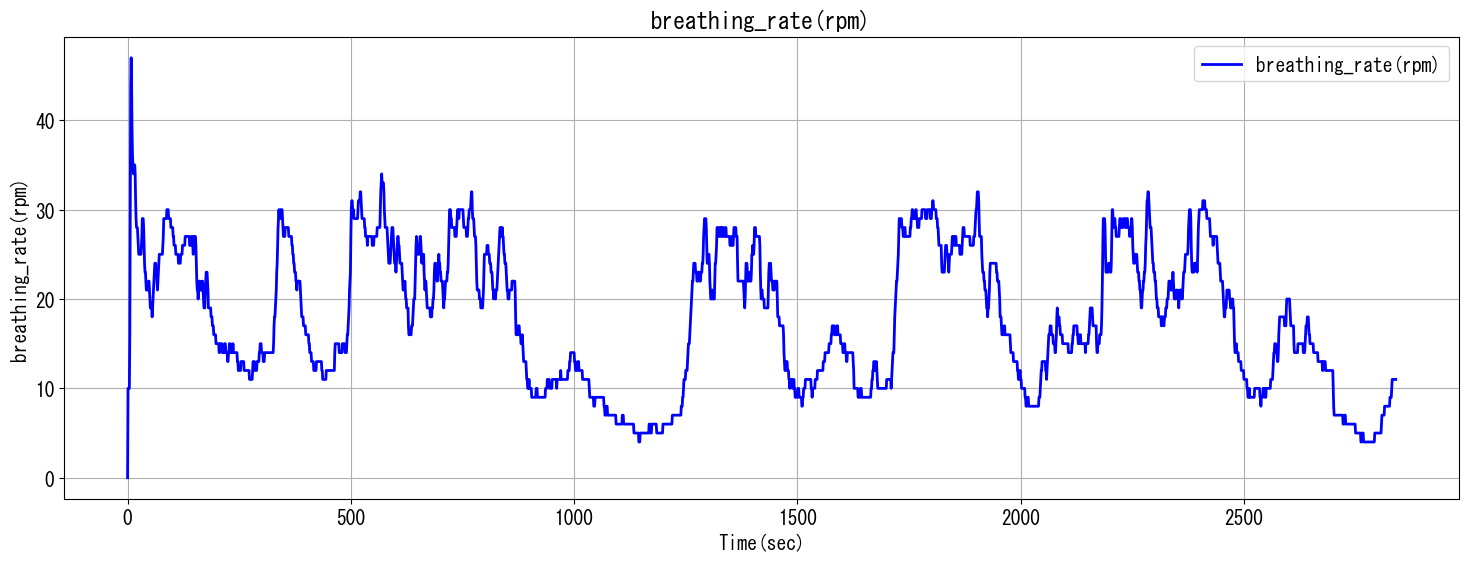

6


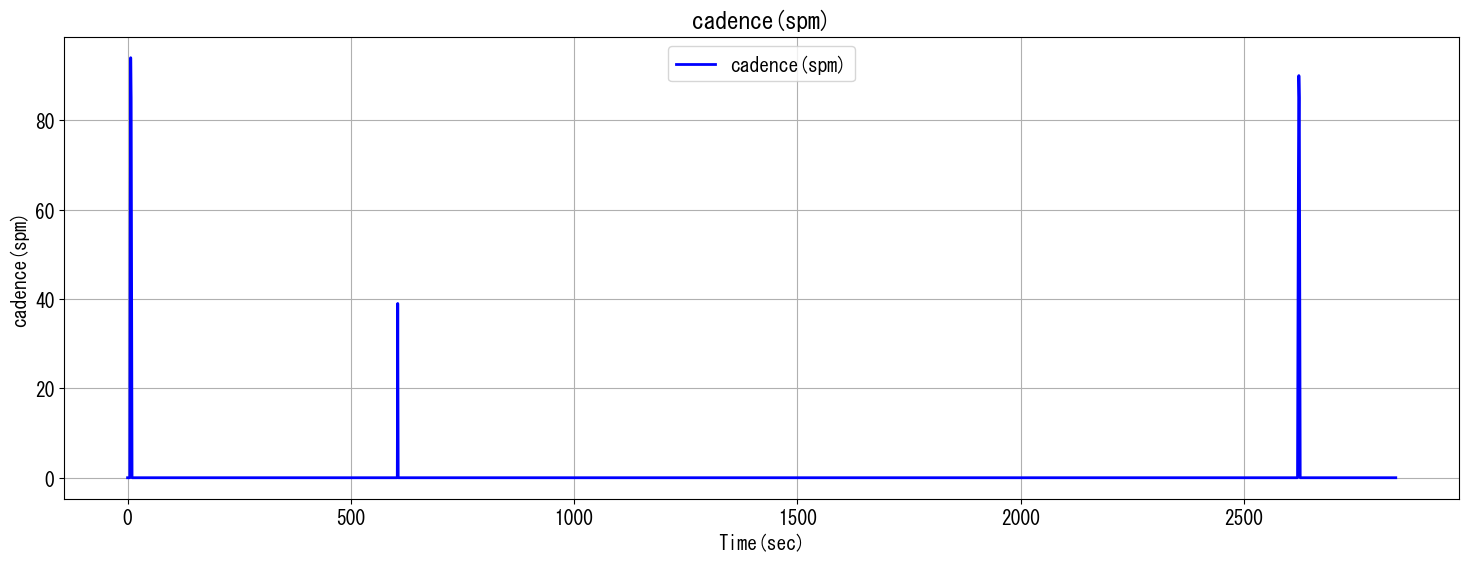

7


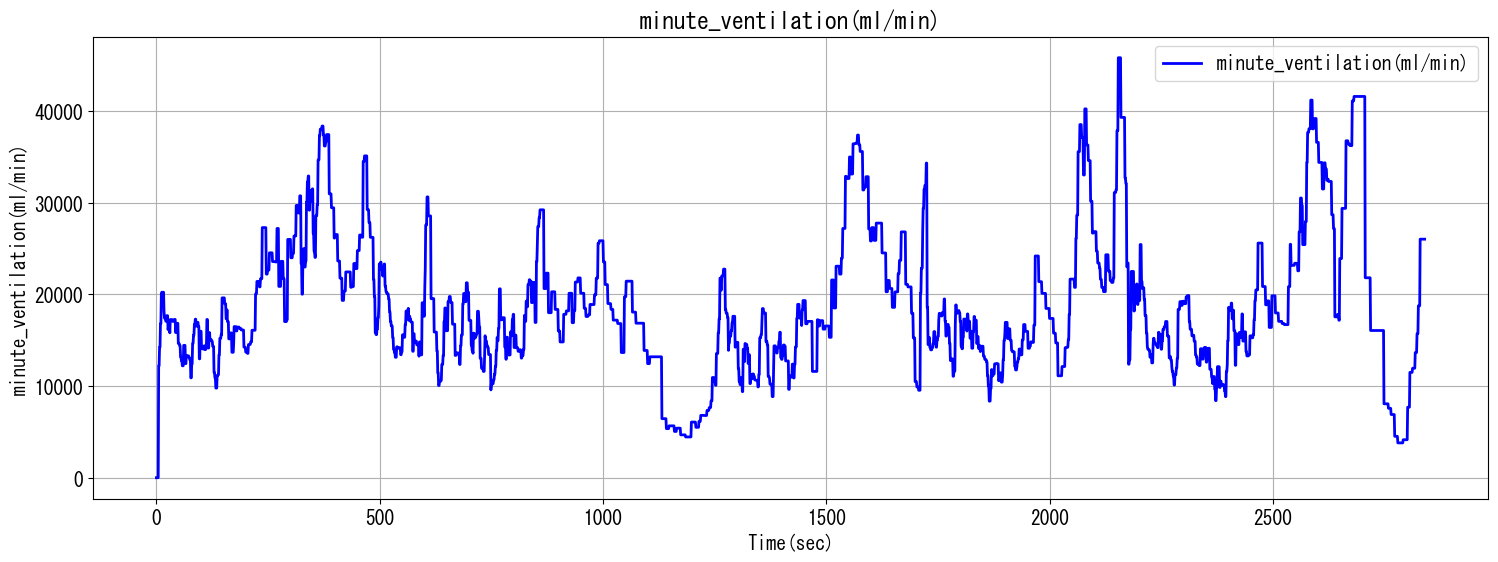

8


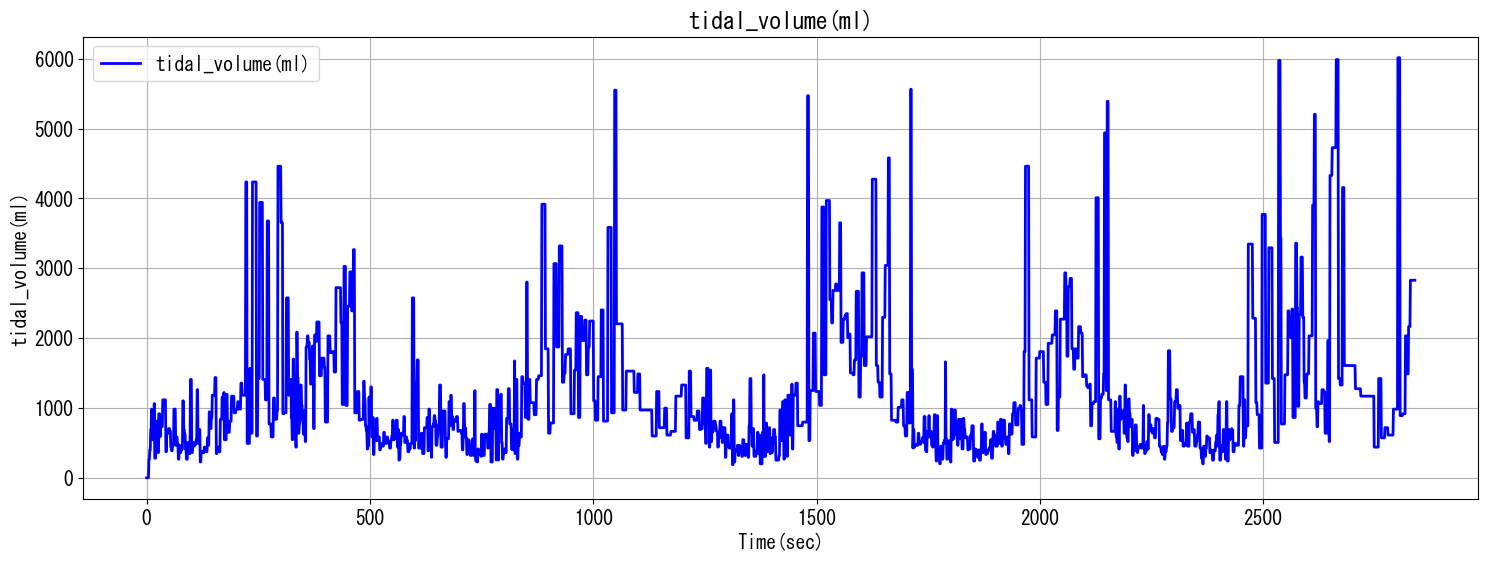

9


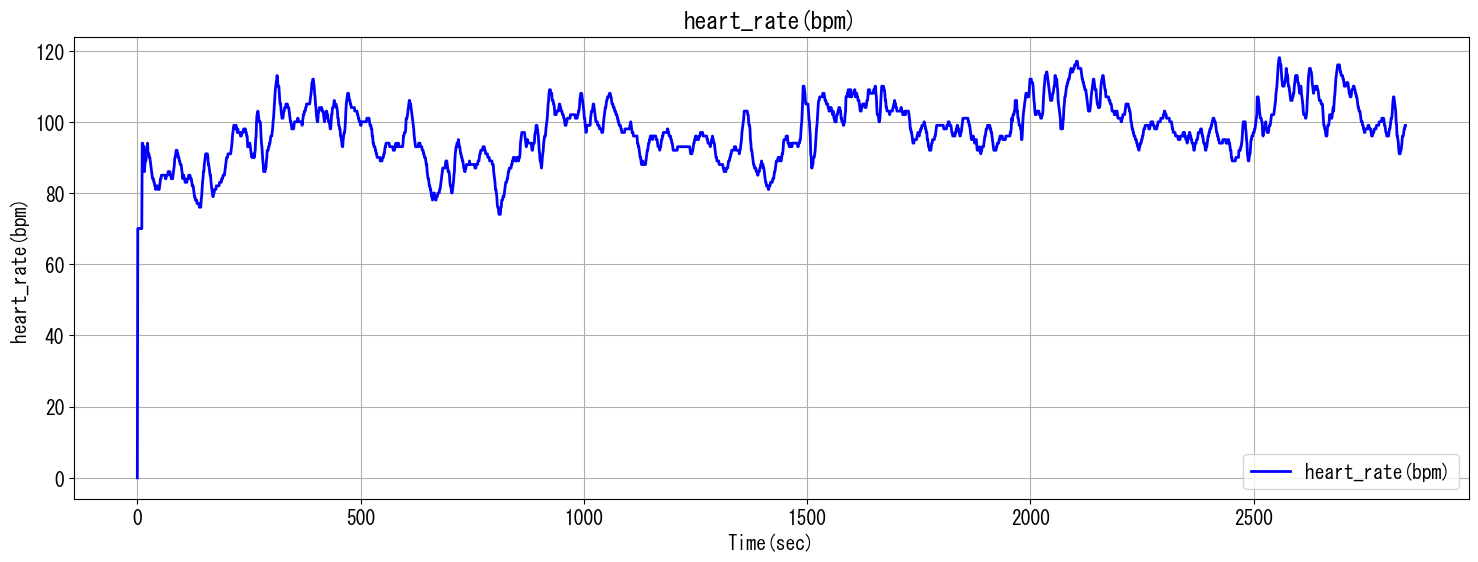

10


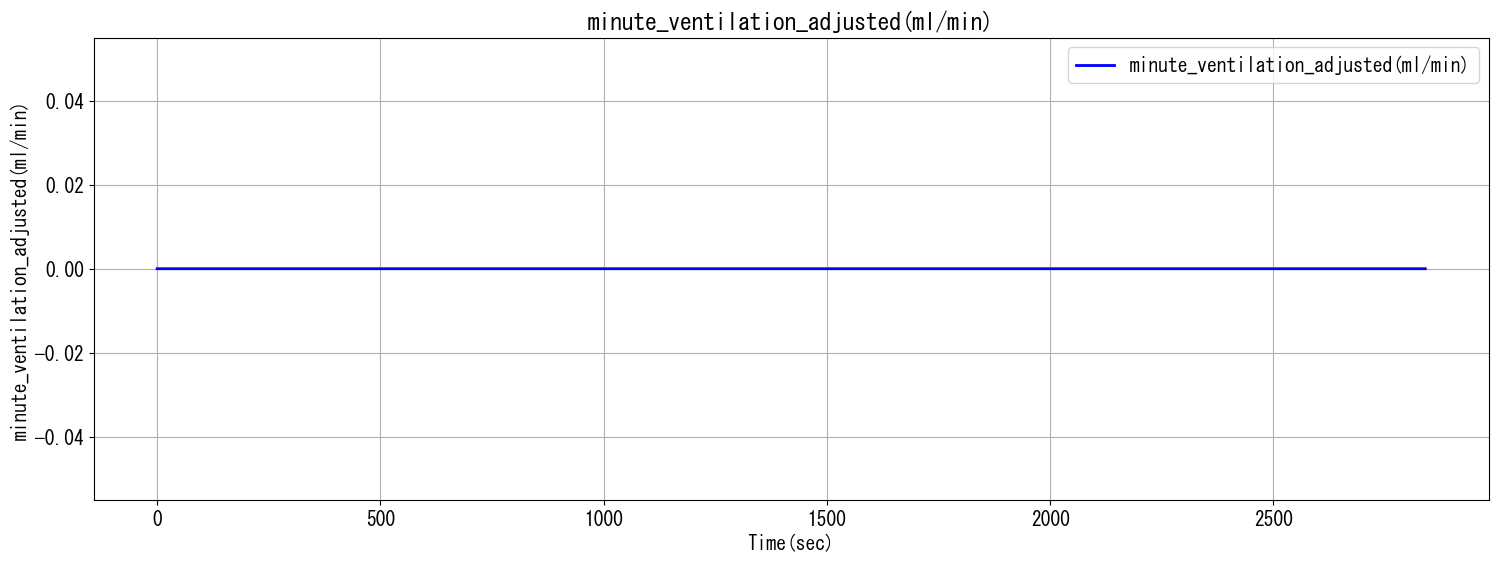

11


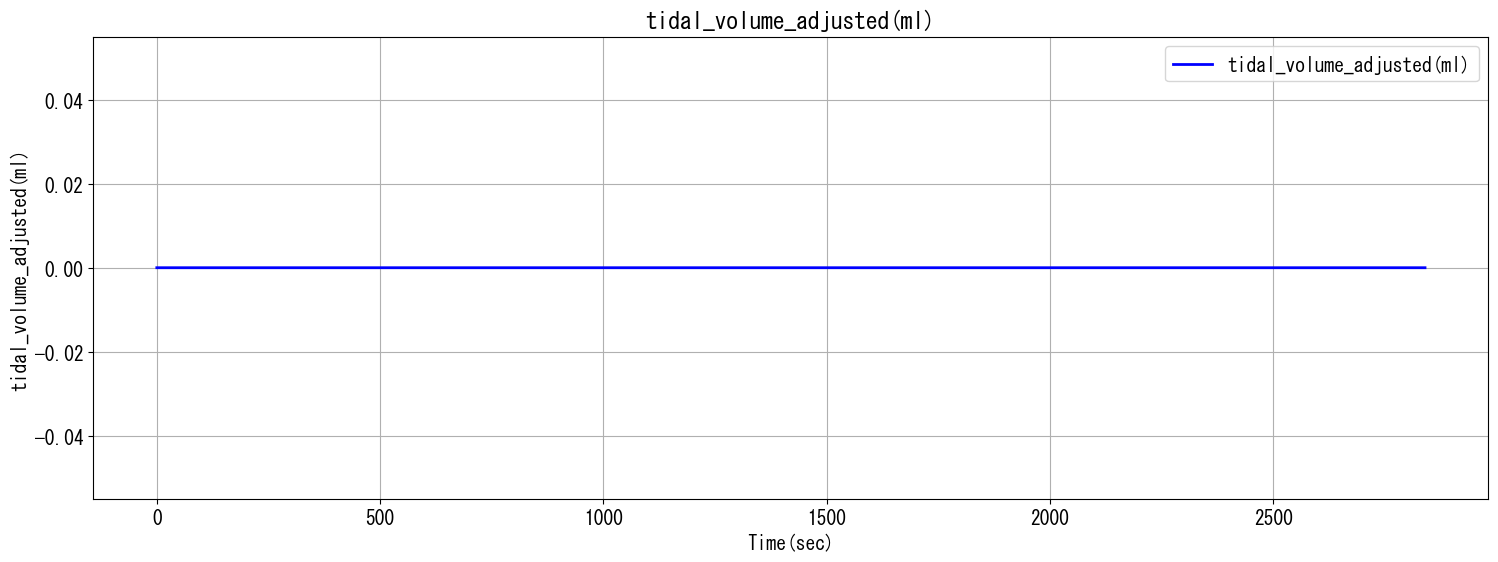

12


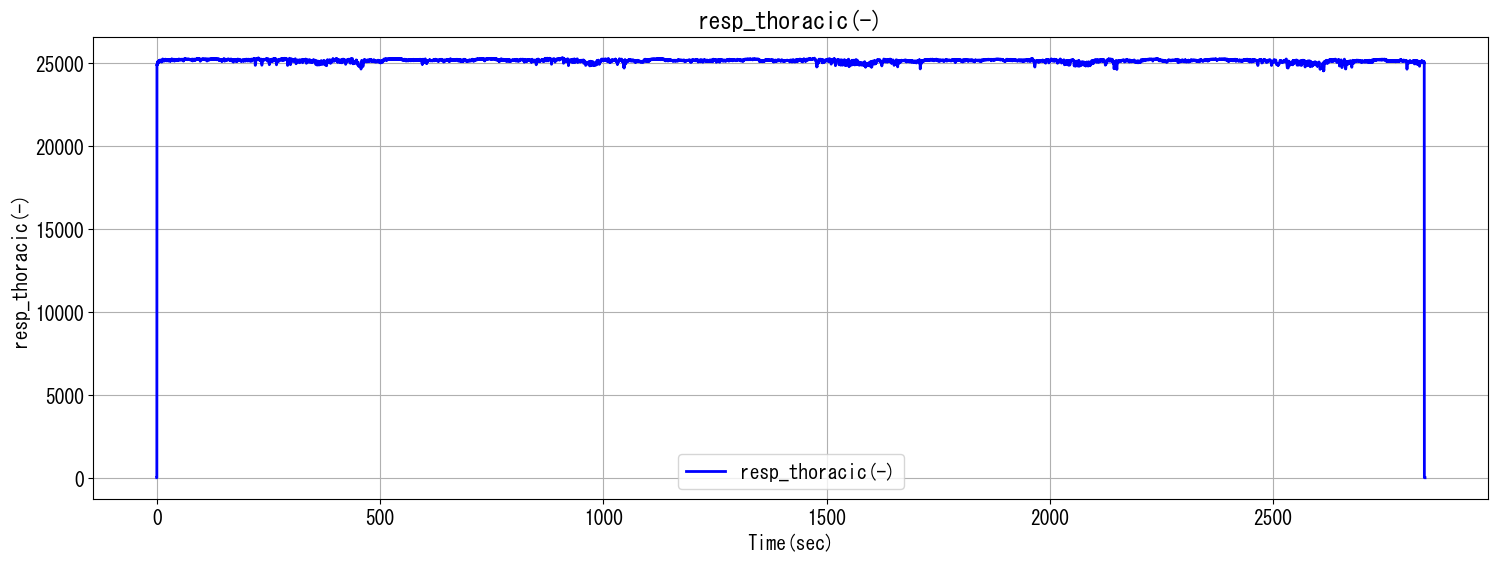

13


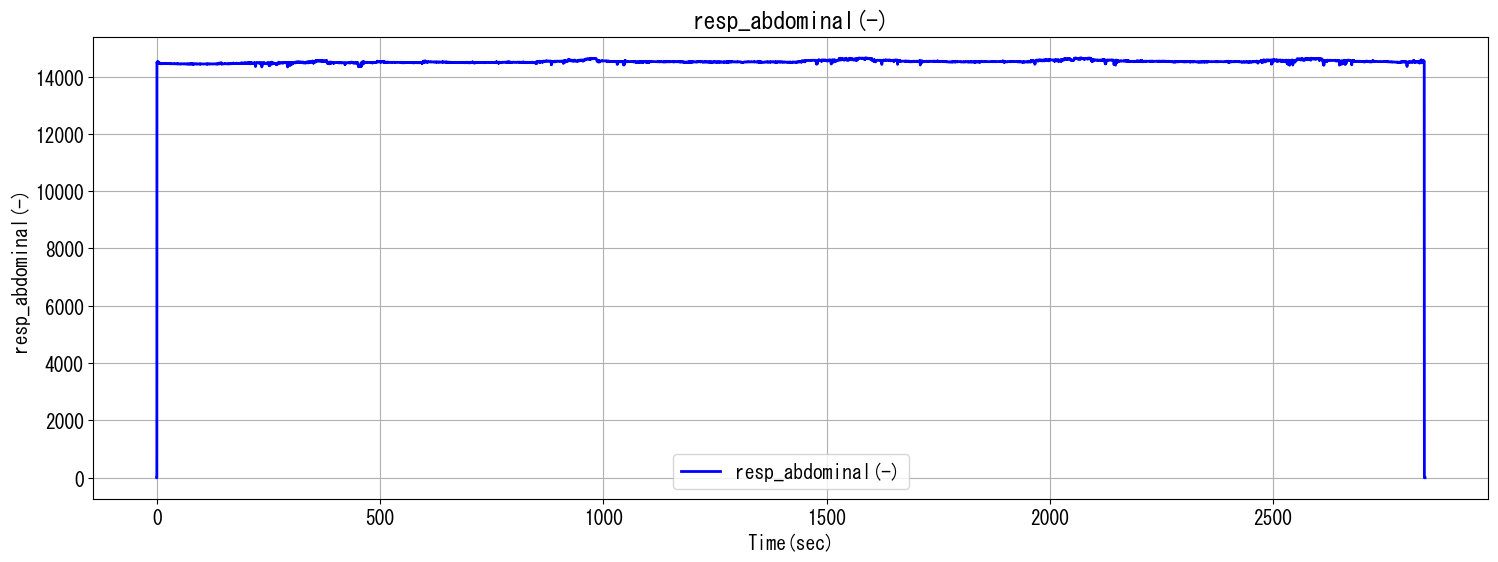

14
END


In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import os

#定数
FOLDER_ADDRESS = r"C:\Users\ginnt\デスクトップ\python\11月10日日産自動車工場作業環境再現調査\データ分析.ipynb"

#変数の間
#csvファイルの番号
csv_columns_number = 0
#カラムの番号
columns_number = 2


#関数の間
#同一フォルダ内のcsvファイルの名前を取得
def get_csv_files_in_same_folder(path):

    # 現在のノートブックのディレクトリを取得 
    notebook_directory = os.path.dirname(os.path.abspath(path))
    # フォルダ内のファイル一覧を取得
    files = os.listdir(notebook_directory)

    # CSVファイルのみを抽出
    csv_files = [file for file in files if file.endswith(".csv")]

    return csv_files

def read_csv(csv_files_list):

    # ファイル名を保存する配列を作成（最低限の大きさで初期化）
    file_names_array = [None] * len(csv_files_list)

    # 配列にファイル名を格納
    for i, csv_file in enumerate(csv_files_list):
        file_names_array[i] = csv_file
    
    #csvの読込み
    read_df = [0]*len(file_names_array)
    for i in range(len(file_names_array)):
        read_df[i] = pd.read_csv(file_names_array[i])
    return read_df
#　csv_recod_data_ploter(データフレーム,レコード番地,グラフタイトル,画像の保存)
def csv_recod_data_ploter(df,record=2,title='Default',save_flg=False):

    """
    print("デバッグ")
    print("csvデータフレームの出力")
    display(csv_df)
    df = csv_df[0]
    print("データフレームの出力")
    display(df)
    print("レコードデータの出力")
    display(df[df.columns[0]])
    """

    #変数
    color="#0000FF"
    title = title

    xlabel = df.columns[0]
    ylabel = df.columns[record]
    font_size = 14
    font_family = 'MS Gothic'
    figsize = (18,6)
    line_width = 2
    rotation = 0
    
    #x軸は固定
    x_axis = df[df.columns[0]]
    #変化するのはY軸
    y_axis = df[df.columns[record]]

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xlim()
    plt.ylim()

    plt.rcParams["font.size"] = font_size
    plt.rcParams["font.family"] = font_family
    plt.rcParams["figure.figsize"] = figsize

    plt.xticks(rotation=rotation)

    plt.plot(x_axis,y_axis,color=color,label=ylabel,linewidth=line_width)
    plt.legend(ncol=1)
    plt.grid()
    #プロットした画像を保存する
    if save_flg == True:
        plt.savefig(str(df.columns) + ".jpg")
    plt.show()

#メイン処理
# CSVファイルの一覧を取得
csv_files_list = get_csv_files_in_same_folder(FOLDER_ADDRESS)

#csvファイルのpandasを利用した読込み
csv_df = read_csv(csv_files_list)

df = csv_df[0]
#csv_recod_data_ploter(df,2,"test",save_flg=False)
csv_file_number = 0
csv_columns_number = 2
csv_recod_number = 0

#csvファイルの個数
print("csvファイルの個数")
csv_file_number_scale = len(csv_df)
#データフレームのカラム数
print("データフレームのカラム数")
csv_columns_number_scale = len(df.columns)
#データフレームのレコード数

print("csv_file_number_scale:" + str(csv_file_number_scale))
print("csv_columns_number_scale:" + str(csv_columns_number_scale))

debug_total_loop = 0
while csv_file_number < csv_file_number_scale:
    #csvファイルを読み込む
    df = csv_df[csv_file_number]
    #ファイル内のデータフレームのカラム数を取得
    csv_columns_number_scale = len(df.columns)

    #カラム数よりループ回数が少ない場合:True 
    while csv_columns_number < csv_columns_number_scale:
         #　csv_recod_data_ploter(データフレーム,レコード番地,グラフタイトル,画像の保存)
         csv_recod_data_ploter(df,record=csv_columns_number,title=df.columns[csv_columns_number],save_flg=False)
         
         csv_columns_number += 1
         debug_total_loop += 1
         print(debug_total_loop)

    csv_columns_number = 2
    csv_file_number +=1
print("END")



In [ ]:


#メイン処理
# CSVファイルの一覧を取得
csv_files_list = get_csv_files_in_same_folder(FOLDER_ADDRESS)

#csvファイルのpandasを利用した読込み
csv_df = read_csv(csv_files_list)

df = csv_df[0]
#csv_recod_data_ploter(df,2,"test",save_flg=False)
csv_file_number = 0
csv_columns_number = 0
csv_recod_number = 0

#csvファイルの個数
print("csvファイルの個数")
csv_file_number_scale = len(csv_df)
#データフレームのカラム数
print("データフレームのカラム数")
csv_columns_number_scale = len(df.columns)
#データフレームのレコード数

print("csv_file_number_scale:" + str(csv_file_number_scale))
print("csv_columns_number_scale:" + str(csv_columns_number_scale))

while csv_file_number <= csv_file_number_scale:

    while csv_columns_number <= csv_columns_number_scale:
         
         csv_recod_data_ploter(df,csv_columns_number,df.columns[csv_columns_number],save_flg=False)
         csv_columns_number += 1

    csv_columns_number = 2
    csv_file_number +=1
